In [2]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
%matplotlib inline

In [4]:
from relaxed.plot_defaults import *

In [5]:
import astropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table
import json
from scipy import stats
from copy import deepcopy
import scipy
import warnings

import matplotlib as mpl
from sklearn.model_selection import train_test_split



In [6]:
from relaxed.analysis import setup, get_quantiles, gaussian_conditional, get_am, get_a2_from_am, get_lam

# Data

In [7]:
# catalog
hcat, indices, scales = setup('m11', path='../../output')

# obtain a_m
am, mass_bins = get_am('m11', min_mass=0.1, path='../../output')

# Calculate gradients

In [10]:
mass_bins.shape

(100,)

In [9]:
am.shape

(10000, 100)

In [11]:
# no smoothing
gammas = [] 
for i in range(1, len(mass_bins)):
    DeltaLogM = np.log(mass_bins[i]) - np.log(mass_bins[i-1])
    DeltaA = am[:, i] - am[:, i-1]
    gamma = DeltaLogM.reshape(1) / DeltaA.reshape(-1)
    gammas.append(gamma)
gammas = np.array(gammas).reshape(-1, 99)

(array([3.590e+03, 2.005e+03, 1.332e+03, 8.690e+02, 5.830e+02, 4.190e+02,
        2.750e+02, 2.090e+02, 1.390e+02, 9.200e+01, 7.100e+01, 7.000e+01,
        2.900e+01, 2.800e+01, 1.200e+01, 1.500e+01, 1.600e+01, 1.900e+01,
        2.300e+01, 1.000e+01, 1.600e+01, 8.000e+00, 1.300e+01, 1.200e+01,
        6.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 3.000e+00]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

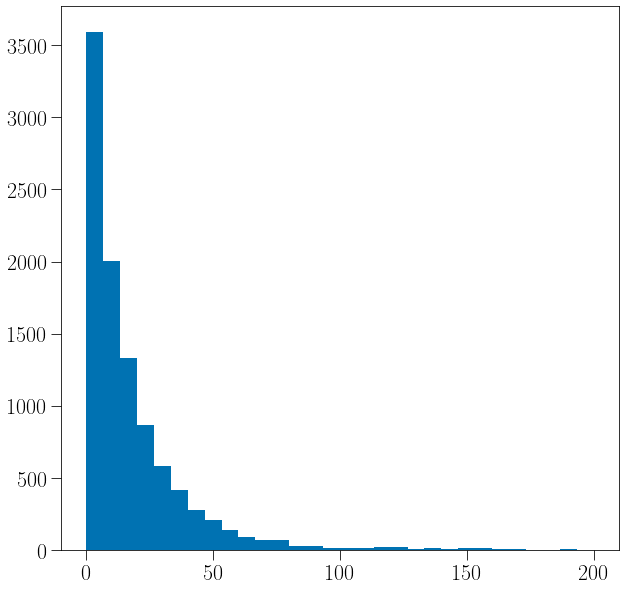

In [16]:
plt.hist(gammas[:, 50], bins=30, range=(0, 200))